In [1]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Logistic function
def logistic(r, x):
    return r * x * (1 - x)

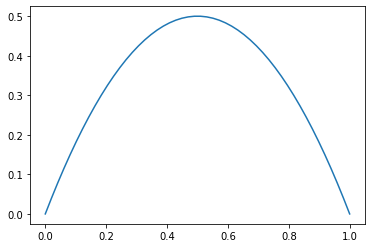

In [3]:
# Graphical representation of the function.
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x))

In [4]:
# Iterate the function for a given growth rate, and plot the results.
def logistic_equation_orbit(x0, r, iteration, skip=0):
    X = []
    T = []
    t = 0
    x = x0
    
    # Iterate the logistic equation, printing only after 'skip' steps.
    for i in range(iteration + skip):
        if i >= skip:
            X.append(x)
            T.append(t)
            t+=1
        x = logistic(r,x);
        
    plt.plot(T, X)
    plt.ylim(0, 1)
    plt.xlim(0, T[-1])
    plt.xlabel('Time')
    plt.ylabel('X')
    plt.title(f"Orbit for $r={r:.1f}, \, x_0={x0:.1f}$\nPlotting {iteration} iterations after skipping {skip}.\n")
    plt.show()

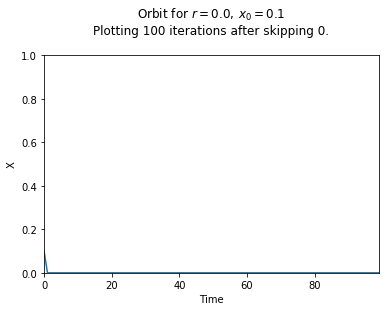

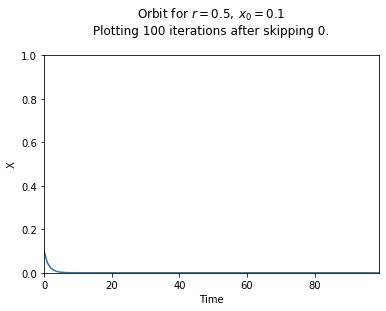

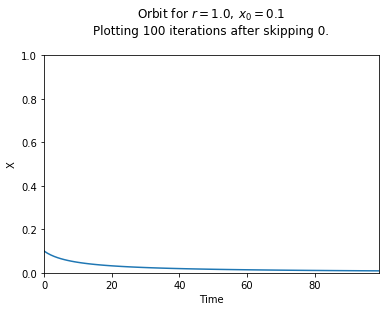

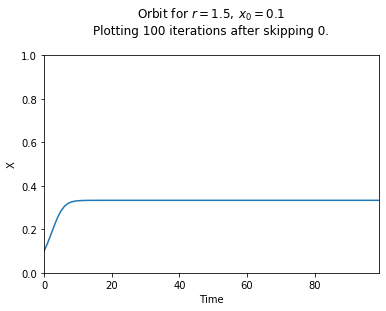

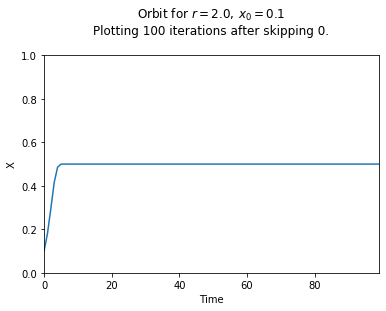

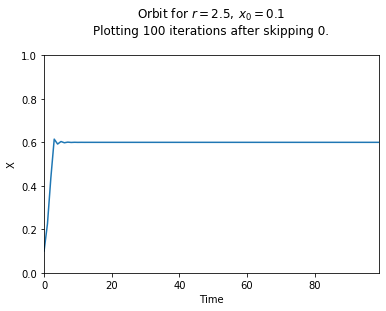

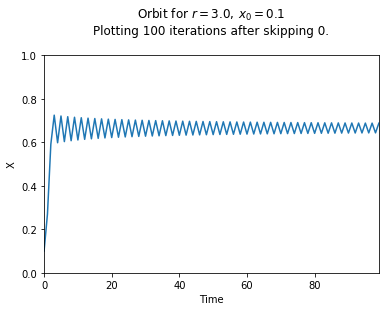

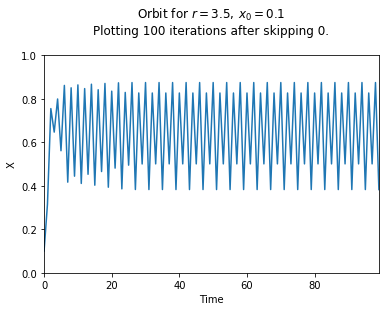

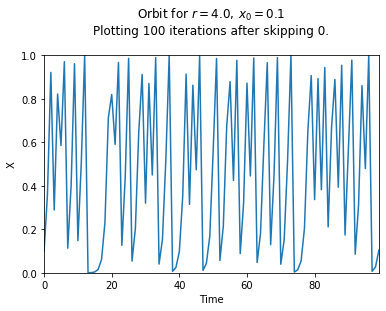

In [5]:
logistic_equation_orbit(0.1, 0.0, 100)
logistic_equation_orbit(0.1, 0.5, 100)
logistic_equation_orbit(0.1, 1.0, 100)
logistic_equation_orbit(0.1, 1.5, 100)
logistic_equation_orbit(0.1, 2.0, 100)
logistic_equation_orbit(0.1, 2.5, 100)
logistic_equation_orbit(0.1, 3.0, 100)
logistic_equation_orbit(0.1, 3.5, 100)
logistic_equation_orbit(0.1, 4.0, 100)

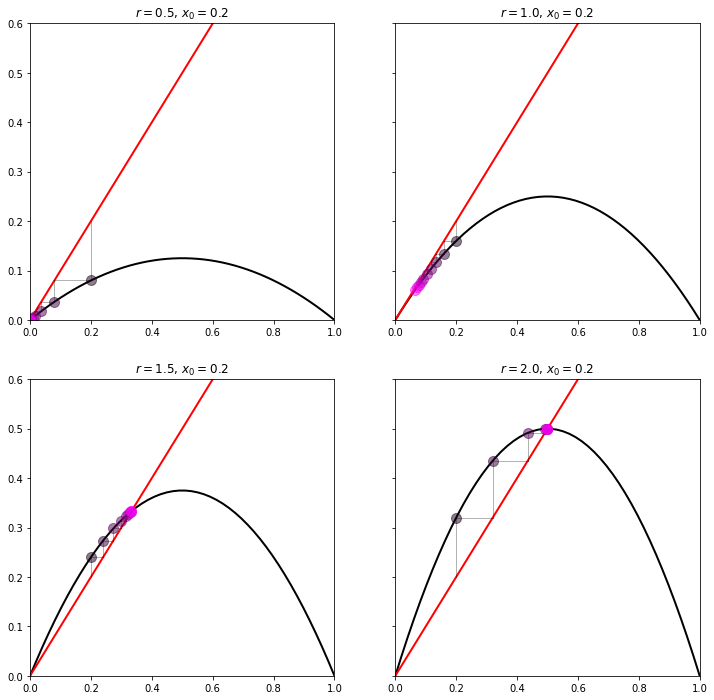

In [6]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'r', lw=2)

    # Recursively apply logistic function.
    x = x0
    for i in range(n):
        y = logistic(r, x)
        
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', alpha=0.3, lw=1)
        ax.plot([x, y], [y, y], 'k', alpha=0.3, lw=1)
        
        # Plot the positions with increasing saturation.
        ax.plot([x], [y], 'ok', ms=10, color=((i + 1)/n,0,(i + 1)/n, 1), alpha=0.5)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.6)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

plot_system(0.5, .2, 10, ax=axs[0, 0])
plot_system(1.0, .2, 10, ax=axs[0, 1])
plot_system(1.5, .2, 10, ax=axs[1, 0])
plot_system(2.0, .2, 10, ax=axs[1, 1])

In [7]:
n = 10000
r = np.linspace(0.1, 4.0, n)

In [8]:
iterations = 1000
last = 200

In [9]:
x = 1e-5 * np.ones(n)

In [10]:
lyapunov = np.zeros(n)

Text(0.5, 1.0, 'Lyapunov Exponent')

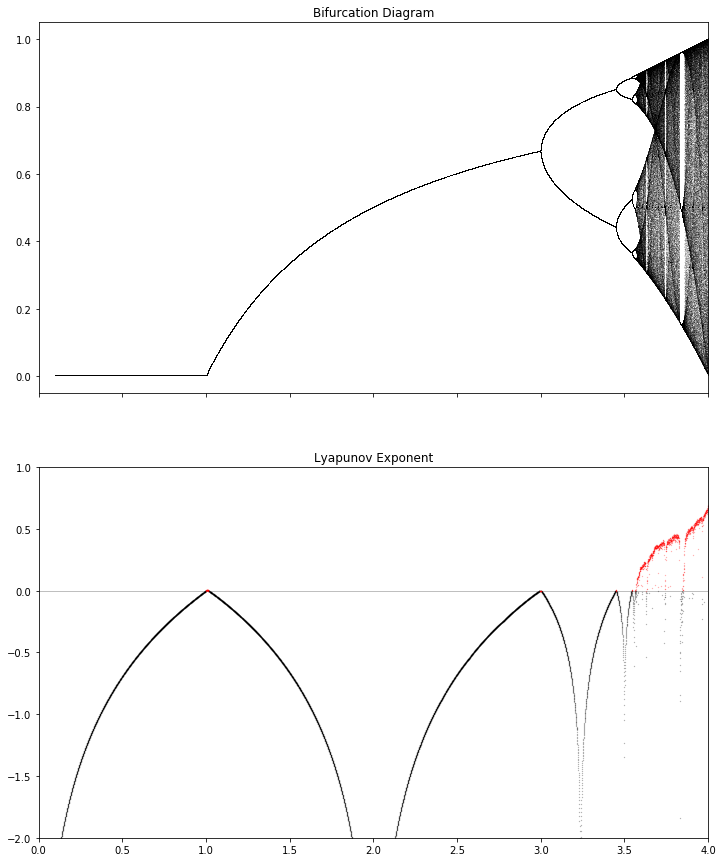

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15), sharex=True)

for i in range(iterations):
    x = logistic(r, x)
    
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.1)
        
ax1.set_xlim(0, 4)
ax1.set_title("Bifurcation Diagram")

# Display the Lyapunov exponent, horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(0, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov Exponent")